In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy.random as rnd 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [4]:
rnd.seed(42)

In [5]:
data=pd.read_csv('housing.csv')

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E55A954E10>,
      dtype=object)

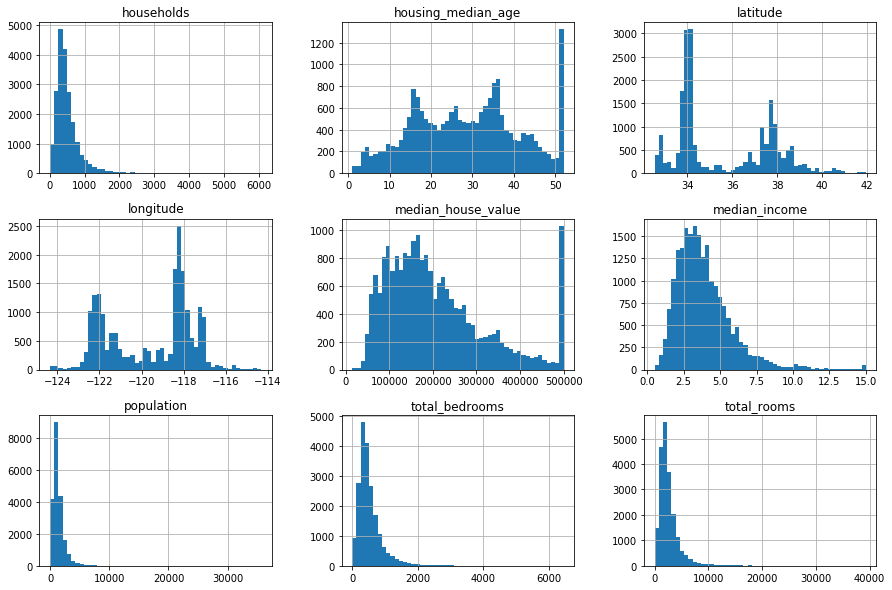

In [10]:
data.hist(bins=50,figsize=(15,10))

In [11]:
data['income_cat']=np.ceil(data['median_income']/1.5)
data['income_cat'].where(data['income_cat']<5,5.0,inplace=True)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data['income_cat']):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

In [14]:
strat_train_set.drop('income_cat',axis=1,inplace=True)
strat_test_set.drop('income_cat',axis=1,inplace=True)

In [15]:
strat_train_set.to_csv("strat_train_set.csv",index=False)
strat_test_set.to_csv("strat_test_set.csv",index=False)

In [16]:
data=pd.read_csv('strat_train_set.csv')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null int64
total_rooms           16512 non-null int64
total_bedrooms        16354 non-null float64
population            16512 non-null int64
households            16512 non-null int64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
median_house_value    16512 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB


Text(0.5, 1.0, 'Distribution of households')

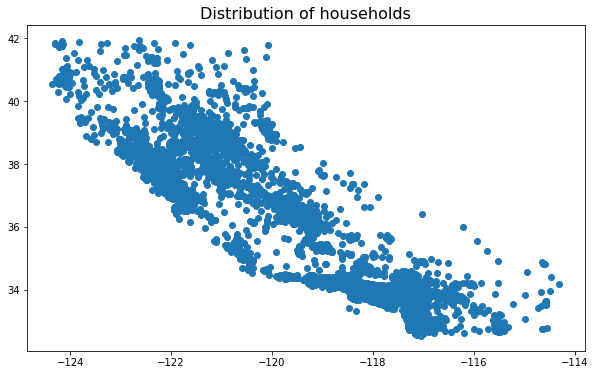

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'])
plt.title("Distribution of households",size=16)

Text(0.5, 1.0, 'Distribution of households')

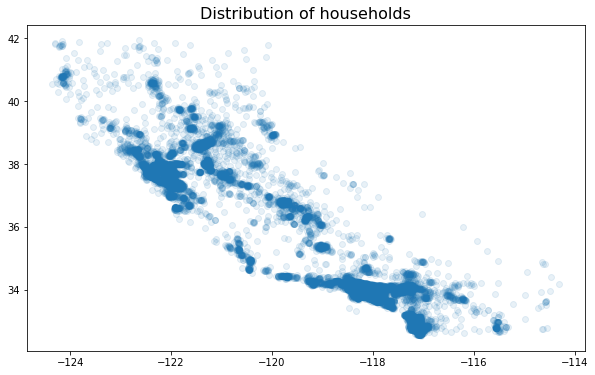

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.1)
plt.title("Distribution of households",size=16)

In [20]:
plt.figure(figsize=(12,12))
img=plt.imread('california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])
plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.5,s=data['population']/30,c=data['median_house_value'],cmap=plt.get_cmap("jet"),zorder=1,label='population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: 'california.png'

<Figure size 864x864 with 0 Axes>

In [22]:
corr_matrix=data.corr()

In [23]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

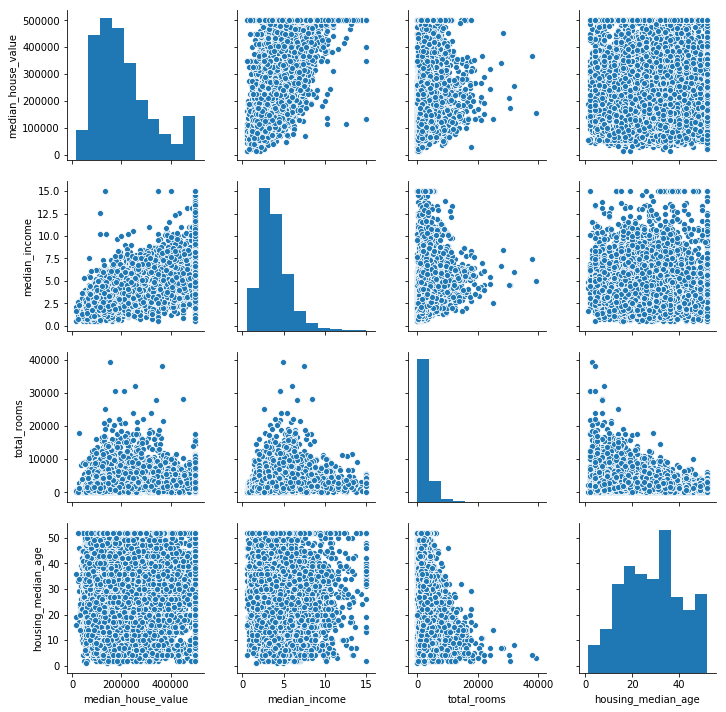

In [24]:
sns.pairplot(data[['median_house_value','median_income','total_rooms','housing_median_age']])

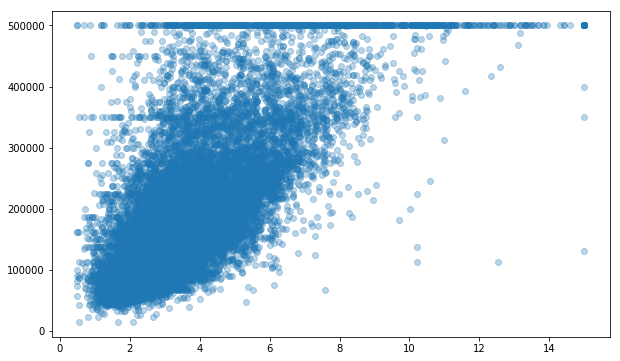

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(y=data['median_house_value'],x=data['median_income'],alpha=0.3)

In [26]:
data1=data.copy()

In [27]:
data1['rooms_per_household']=data1['total_rooms']/data1['households']
data1['bedrooms_per_room']=data1['total_bedrooms']/data1['total_rooms']
data1['population_per_household']=data1['population']/data1['households']

In [28]:
data1.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.89,37.29,38,1568,351.0,710,339,2.7042,<1H OCEAN,286600,4.625369,0.223852,2.094395


In [29]:
corr_matrix=data1.corr()

In [30]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [31]:
class FeaturesAdder(BaseEstimator,TransformerMixin):
    def fit(self,x,y=None):
        return self
    def transform(self,x,y=None):
        X['rooms_per_household']=X['total_rooms']/X['households']
        X['bedrooms_per_room']=X['total_bedrooms']/X['total_rooms']
        X['population_per_household']=X['population']/X['households']
        return X

In [32]:
def get_null_count(data):
    for i in data.columns:
        print(i,':',len(data[data[i].isnull()]))

In [33]:
get_null_count(data)

longitude : 0
latitude : 0
housing_median_age : 0
total_rooms : 0
total_bedrooms : 158
population : 0
households : 0
median_income : 0
ocean_proximity : 0
median_house_value : 0


In [34]:
data_null=data[data['total_bedrooms'].isnull()]

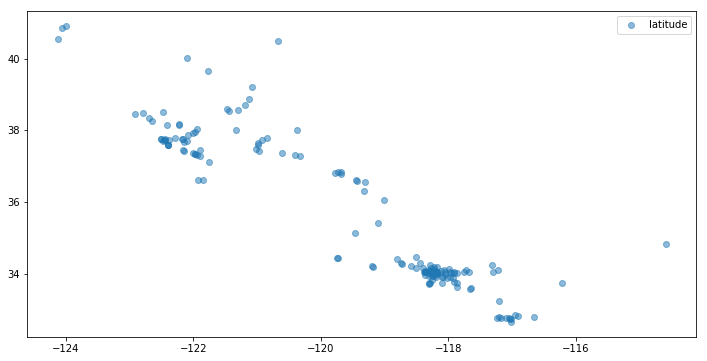

In [35]:
plt.figure(figsize=(12,6))
plt.scatter(x=data_null['longitude'],y=data_null['latitude'],alpha=0.5)
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E55D9E18D0>]],
      dtype=object)

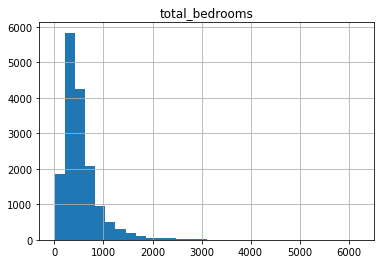

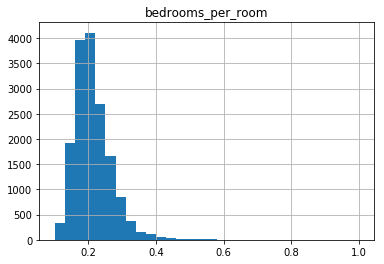

In [36]:
data1.hist(column='total_bedrooms',bins=30)
data1.hist(column='bedrooms_per_room',bins=30)

In [37]:
num_features=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','rooms_per_household','bedrooms_per_room','population_per_household']

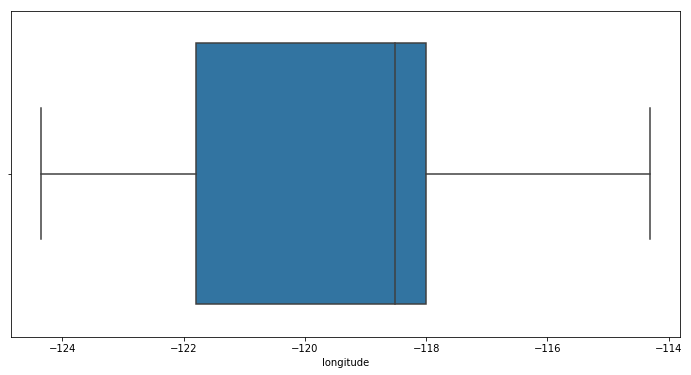

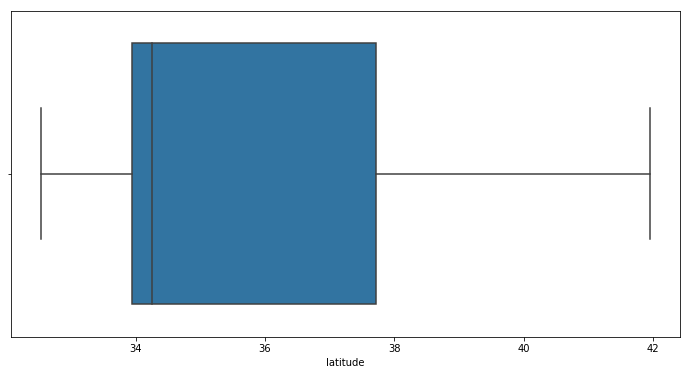

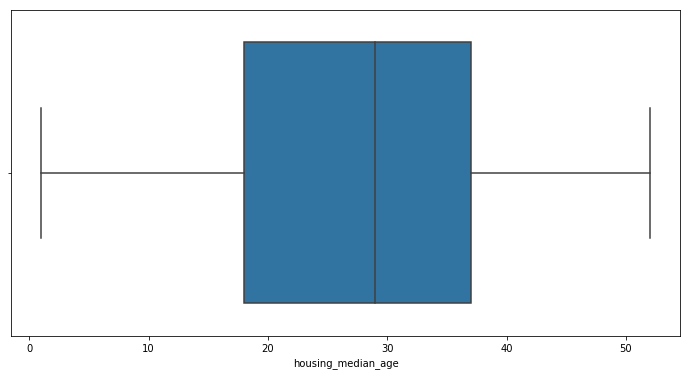

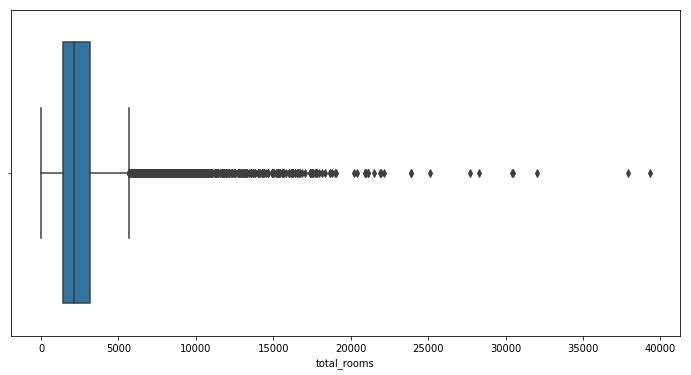

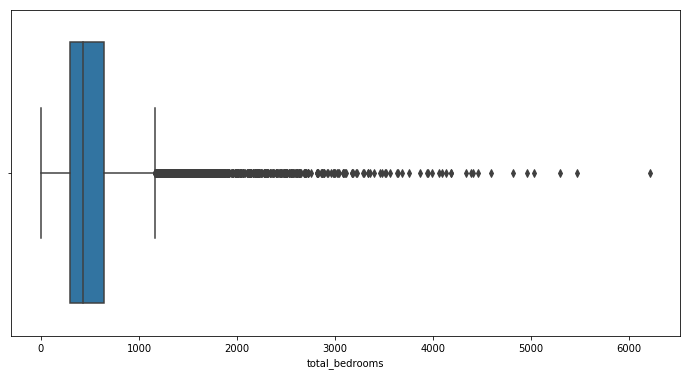

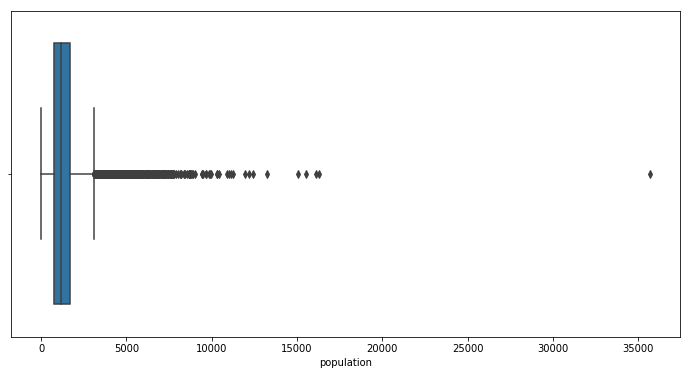

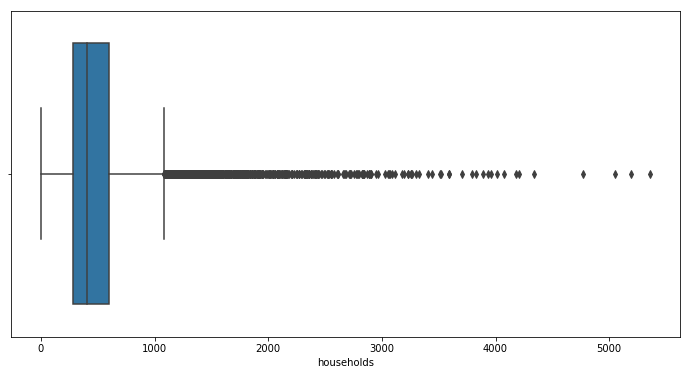

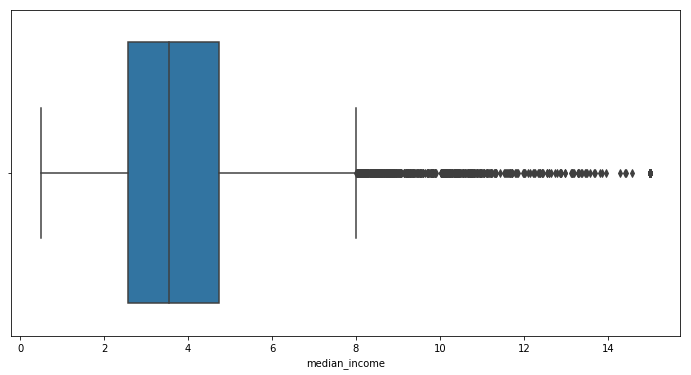

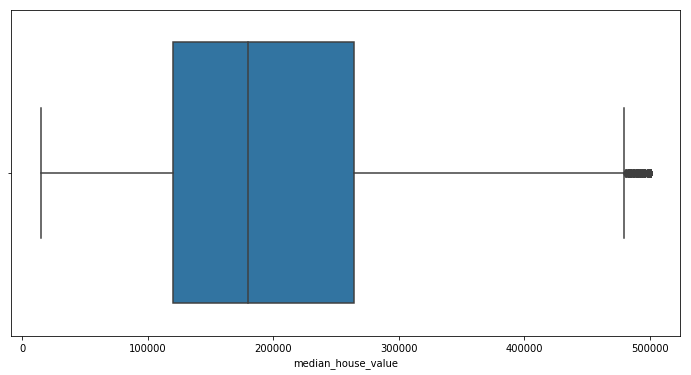

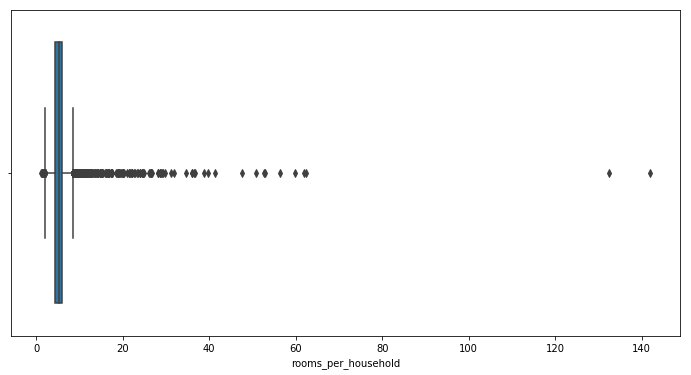

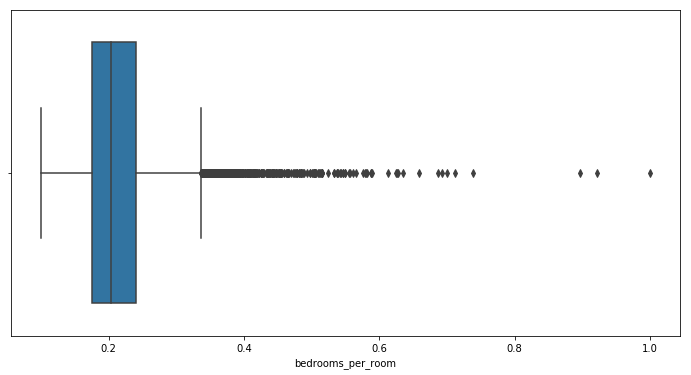

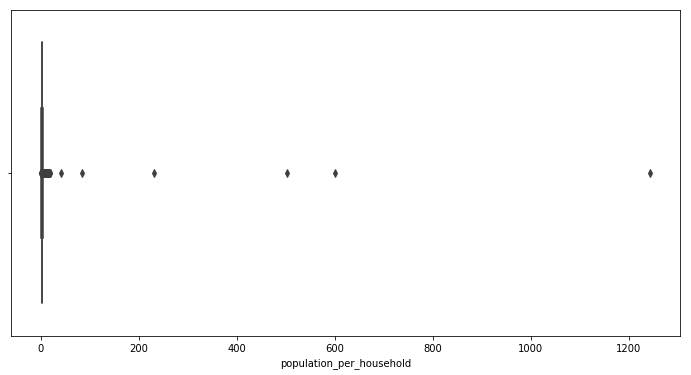

In [38]:
for i in num_features:
    fig,ax=plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=data1,ax=ax)

In [59]:
class RemoveOutliers(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X=X[(X['median_house_value']!=500001)|(X['median_income']>=2)].reset_index(drop=True)
        X=X[X['median_income']<=11].reset_index(drop=True)
        X=X[(X['median_house_value']!=350000)|(X['median_income']>=1.5)].reset_index(drop=True)
        X=X[(X['median_house_value']!=450000)|(X['median_income']>=2)].reset_index(drop=True)
        X=X[(X['median_house_value']!=350000)|(X['median_income']<=9.5)].reset_index(drop=True)
        X=X[X['population']<=9000]
        X=X[(X['population_per_household']>=1.15)&(X['population_per_household']<=6.5)]
        X=X[X['rooms_per_household']<20]
        X=X[X['bedrooms_per_room']<0.5].reset_index(drop=True)
        return X

In [60]:
data1=RemoveOutliers().fit_transform(data1)

KeyError: 'median_house_value'

In [41]:
data_labels=data1['median_house_value']
data1=data1.drop('median_house_value',axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E55EC307F0>,
      dtype=object)

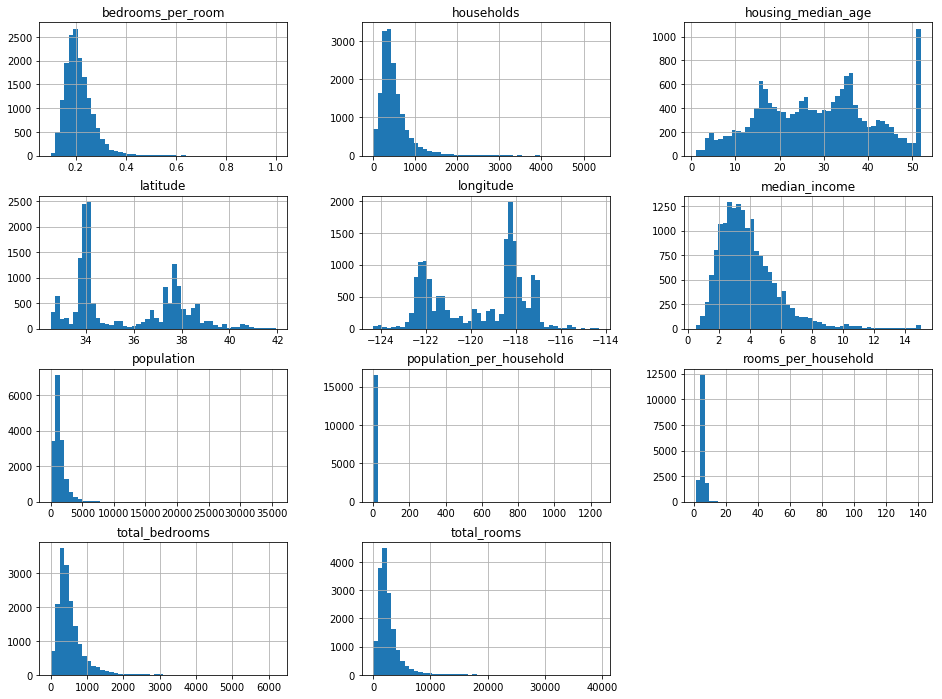

In [42]:
data1.hist(bins=50,figsize=(16,12))

In [43]:
num_features=['longitude','latitude','housing_median_age','total_rooms',
             'total_bedrooms','population','households','median_income',
             'bedrooms_per_room','population_per_household']

In [44]:
skewness=[]
for i in num_features:
    skewness.append(data1[i].skew())
pd.DataFrame(data=skewness,index=num_features,columns=['skewness']).sort_values(by='skewness',ascending=False)

,skewness
population_per_household,87.928173
population,4.741063
total_rooms,4.000398
total_bedrooms,3.268381
households,3.221306
bedrooms_per_room,2.002178
median_income,1.653513
latitude,0.461200
housing_median_age,0.059534
longitude,-0.293318


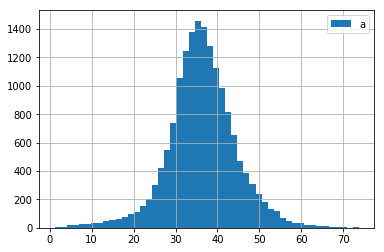

In [45]:
data1['households'].apply(lambda x:np.log1p(x)**2).hist(bins=50,label='a')
plt.legend()

In [50]:
class FeaturesTransformer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        import numpy as np
        from scipy.special import boxcox1p
        X['total_rooms']=X['total_rooms'].apply(lambda x:boxcox1p(x,0.25))
        X['total_bedrooms']=X['total_bedrooms'].apply(lambda x:boxcox1p(x,0.25))
        X['households']=X['households'].apply(lambda x:boxcox1p(x,0.2))
        X['population']=X['population'].apply(lambda x:boxcox1p(x,0.3))
        X['rooms_per_household']=X['rooms_per_household'].apply(lambda x:np.log1p(x)**0.5)
        X['bedrooms_per_room']=X['bedrooms_per_room'].apply(lambda x:np.log1p(x)**0.25)
        X['median_income']=X['median_income'].apply(lambda x:np.log1p(x)**1.25)
        X['population_per_household']=X['population_per_household'].apply(lambda x:np.log1p(x)**1)
        return X
               

In [51]:
data1=FeaturesTransformer().fit_transform(data1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E562089080>,
      dtype=object)

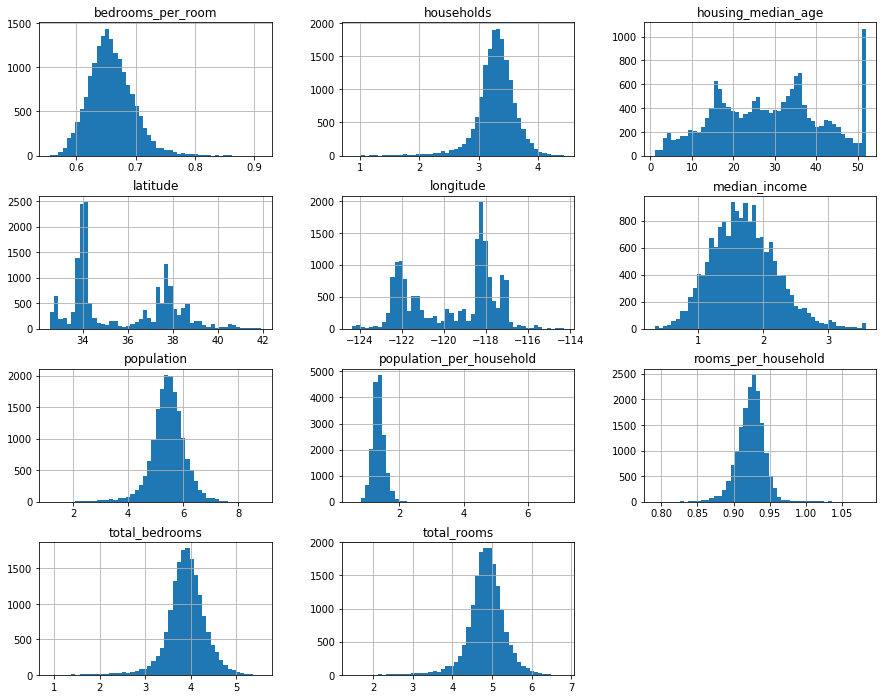

In [62]:
data1.hist(bins=50,figsize=(15,12))